* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data and Setup

____
** Import numpy and pandas **

In [ ]:
import numpy as np
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

** Read in the csv file as a dataframe called df **

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DS&AI_bootcamp/911.csv')

** Check the info() of the df **

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [ ]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic EDA

In [ ]:
df['zip'].value_counts().head()

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

In [ ]:
df['twp'].value_counts().head()

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

In [ ]:
df['title'].nunique()

110

## Creating new features

In [ ]:
df['title'] = df['title'].astype(str)

In [ ]:
df = df[df['title'].notna()]

In [ ]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

In [ ]:
print(df[['title', 'Reason']].head())

                     title Reason
0   EMS: BACK PAINS/INJURY    EMS
1  EMS: DIABETIC EMERGENCY    EMS
2      Fire: GAS-ODOR/LEAK   Fire
3   EMS: CARDIAC EMERGENCY    EMS
4           EMS: DIZZINESS    EMS


In [ ]:
df['Reason'].value_counts().idxmax()

'EMS'

In [ ]:
df = df.dropna(subset=['Reason'])

<ipython-input-17-877d3ab3c0f8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Reason', data=df, palette= 'viridis')


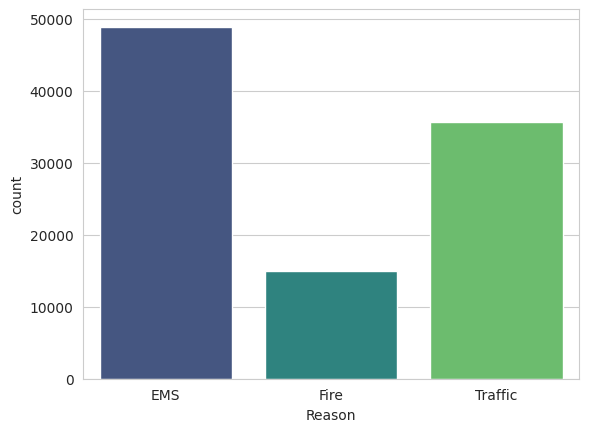

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Reason', data=df, palette= 'viridis')
plt.show()

In [ ]:
print(df['timeStamp'].dtypes)

object


In [ ]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [ ]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [ ]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [ ]:
df['Day of Week'] = df['Day of Week'].map(dmap)

<Axes: xlabel='Day of Week', ylabel='count'>

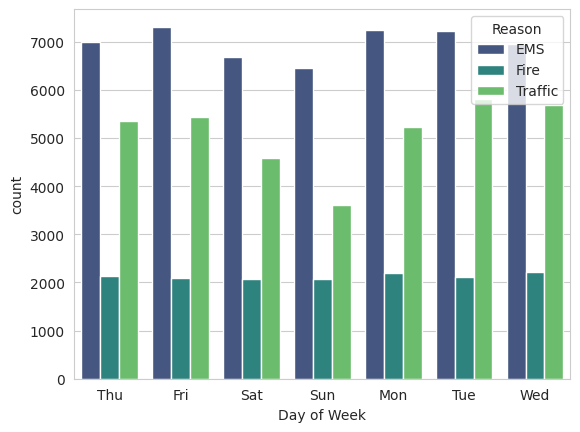

In [ ]:
sns.countplot(x='Day of Week', hue='Reason', data=df, palette='viridis')

<Axes: xlabel='Month', ylabel='count'>

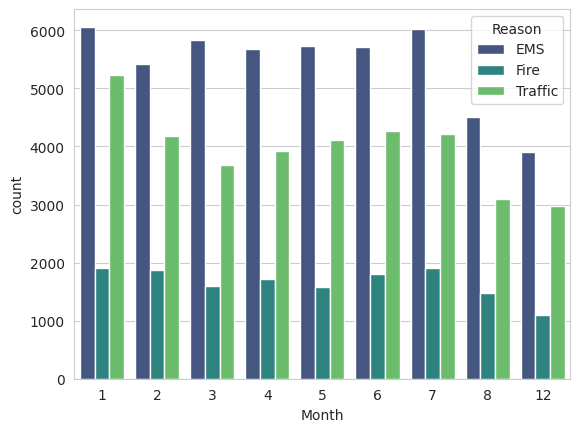

In [ ]:
sns.countplot(x='Month', hue='Reason', data=df, palette='viridis')

In [ ]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


<Axes: xlabel='Month'>

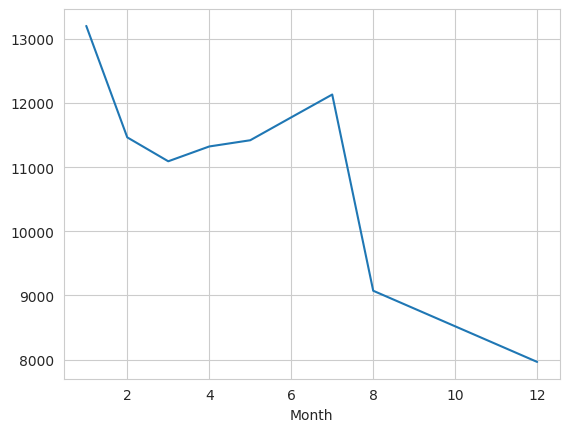

In [ ]:
byMonth['twp'].plot()

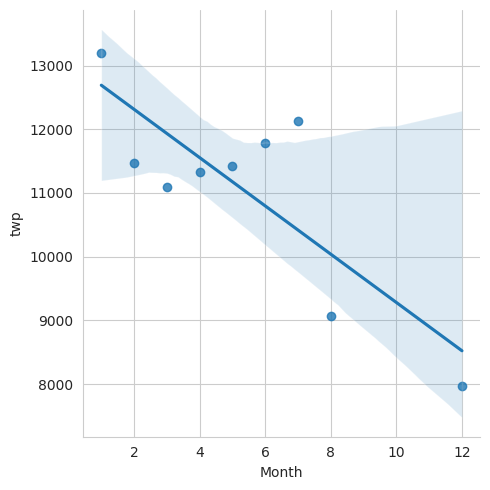

In [ ]:
byMonth = byMonth.reset_index()
sns.lmplot(x='Month', y='twp', data=byMonth)

In [ ]:
df['Date'] = df['timeStamp'].apply(lambda t: t.date())

<Axes: xlabel='Date'>

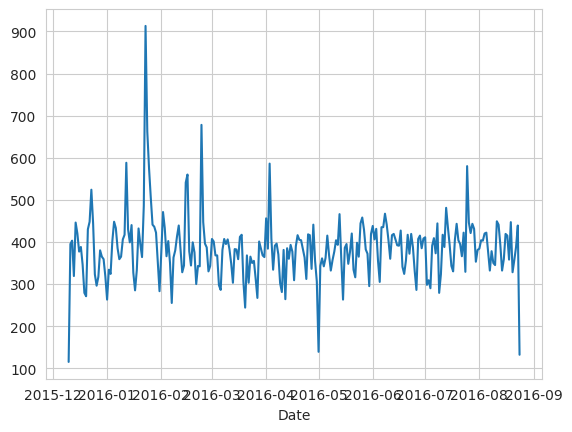

In [ ]:
byDate = df.groupby('Date').count()
byDate['twp'].plot()

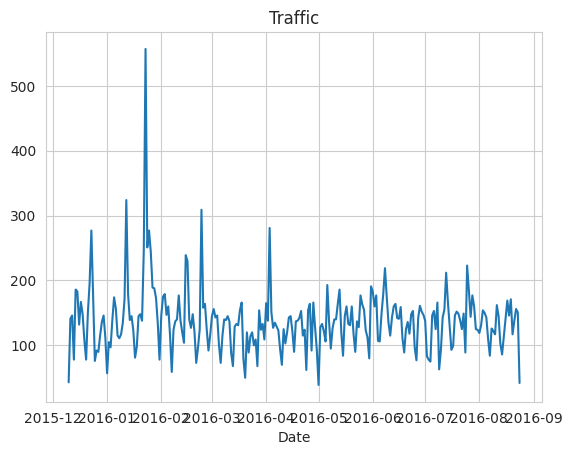

In [ ]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.show()

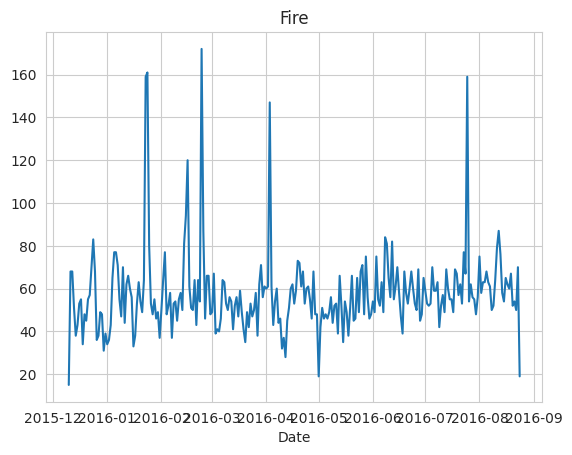

In [ ]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.show()

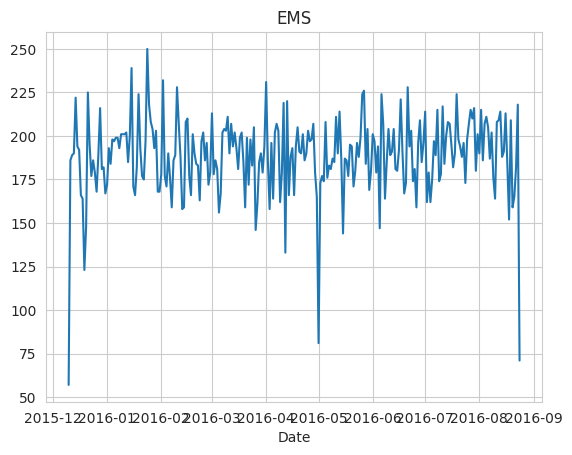

In [ ]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.show()

In [ ]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()

<Axes: xlabel='Hour', ylabel='Day of Week'>

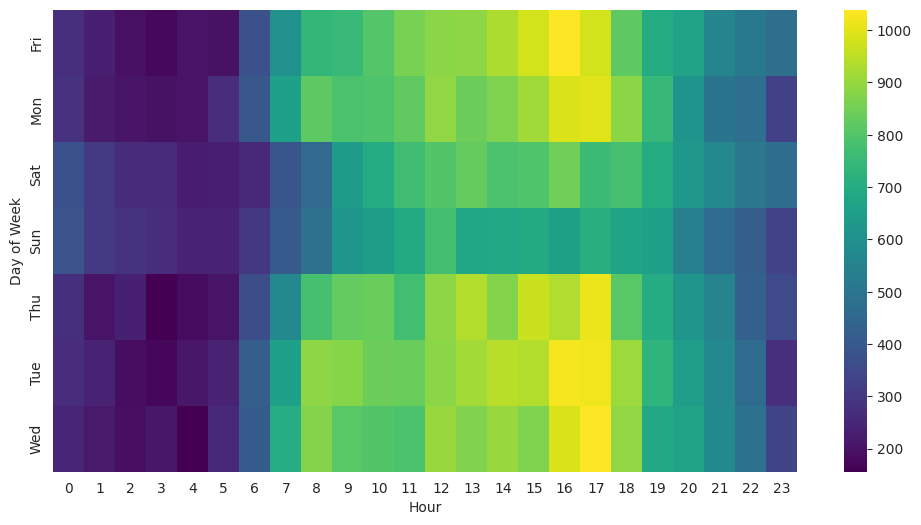

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(dayHour, cmap='viridis')

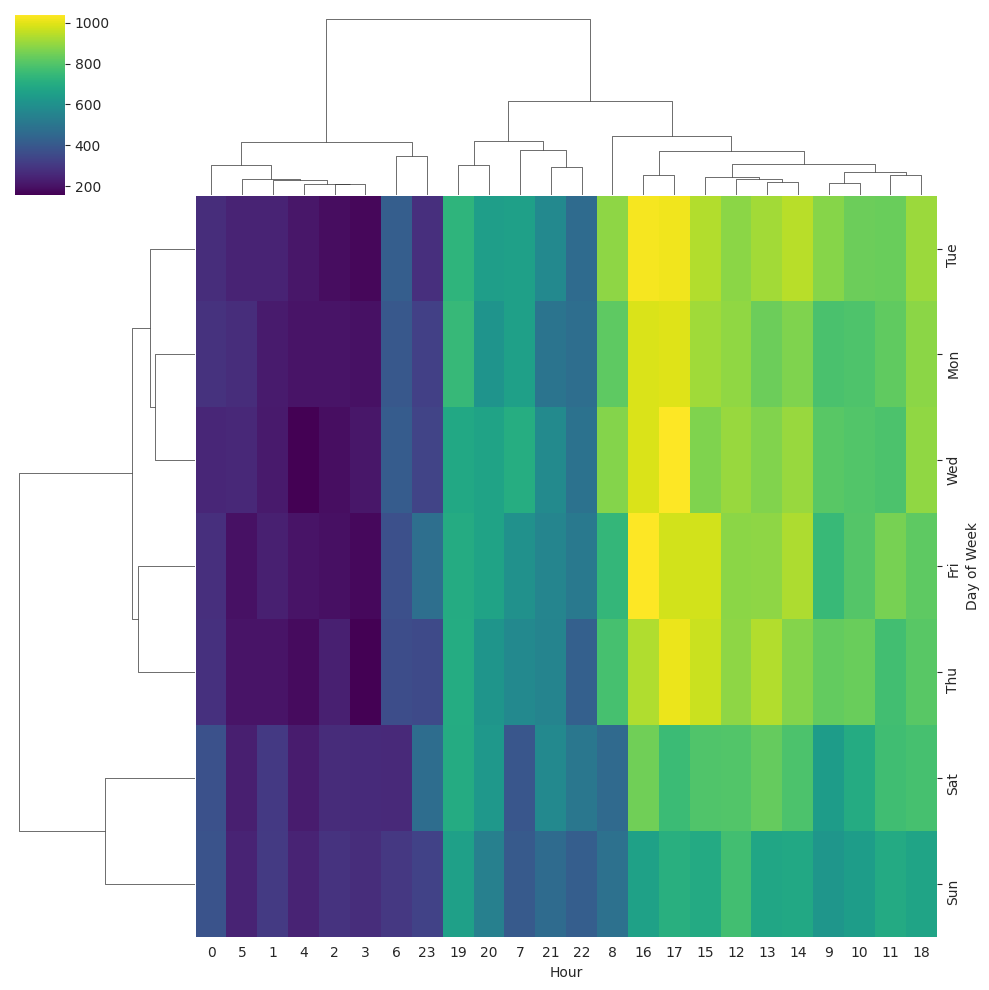

In [ ]:
sns.clustermap(dayHour, cmap='viridis')

In [ ]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()

<Axes: xlabel='Month', ylabel='Day of Week'>

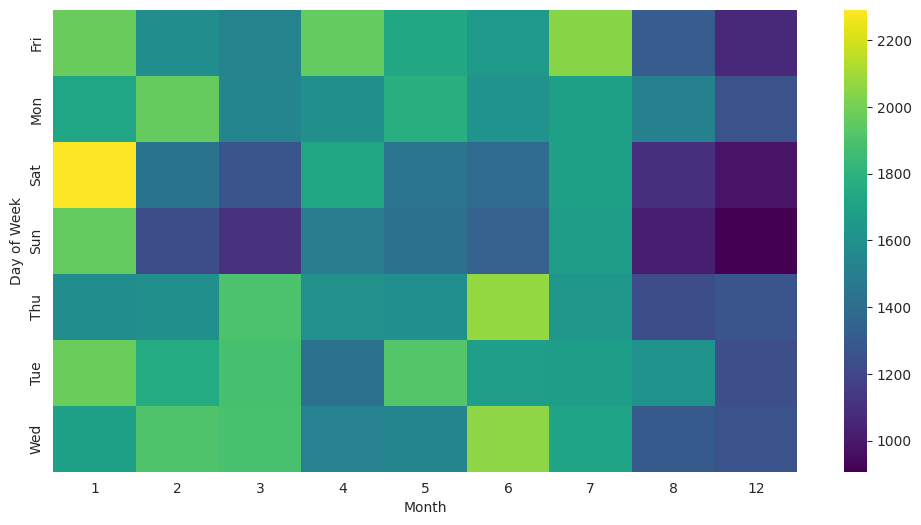

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(dayMonth, cmap='viridis')

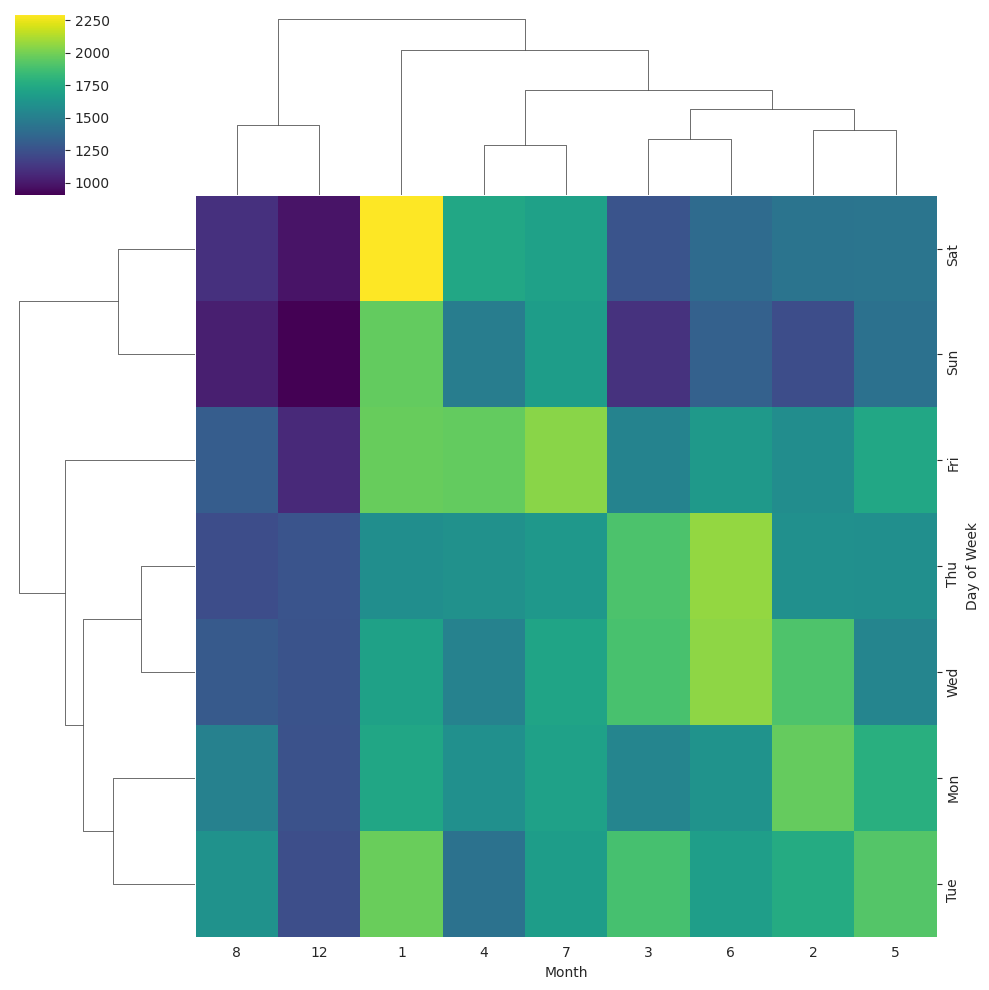

In [ ]:
sns.clustermap(dayMonth, cmap='viridis')